In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.isnull().sum()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


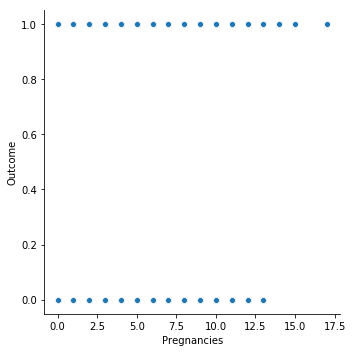

In [3]:
sns.relplot(x='Pregnancies',y='Outcome',data= df)

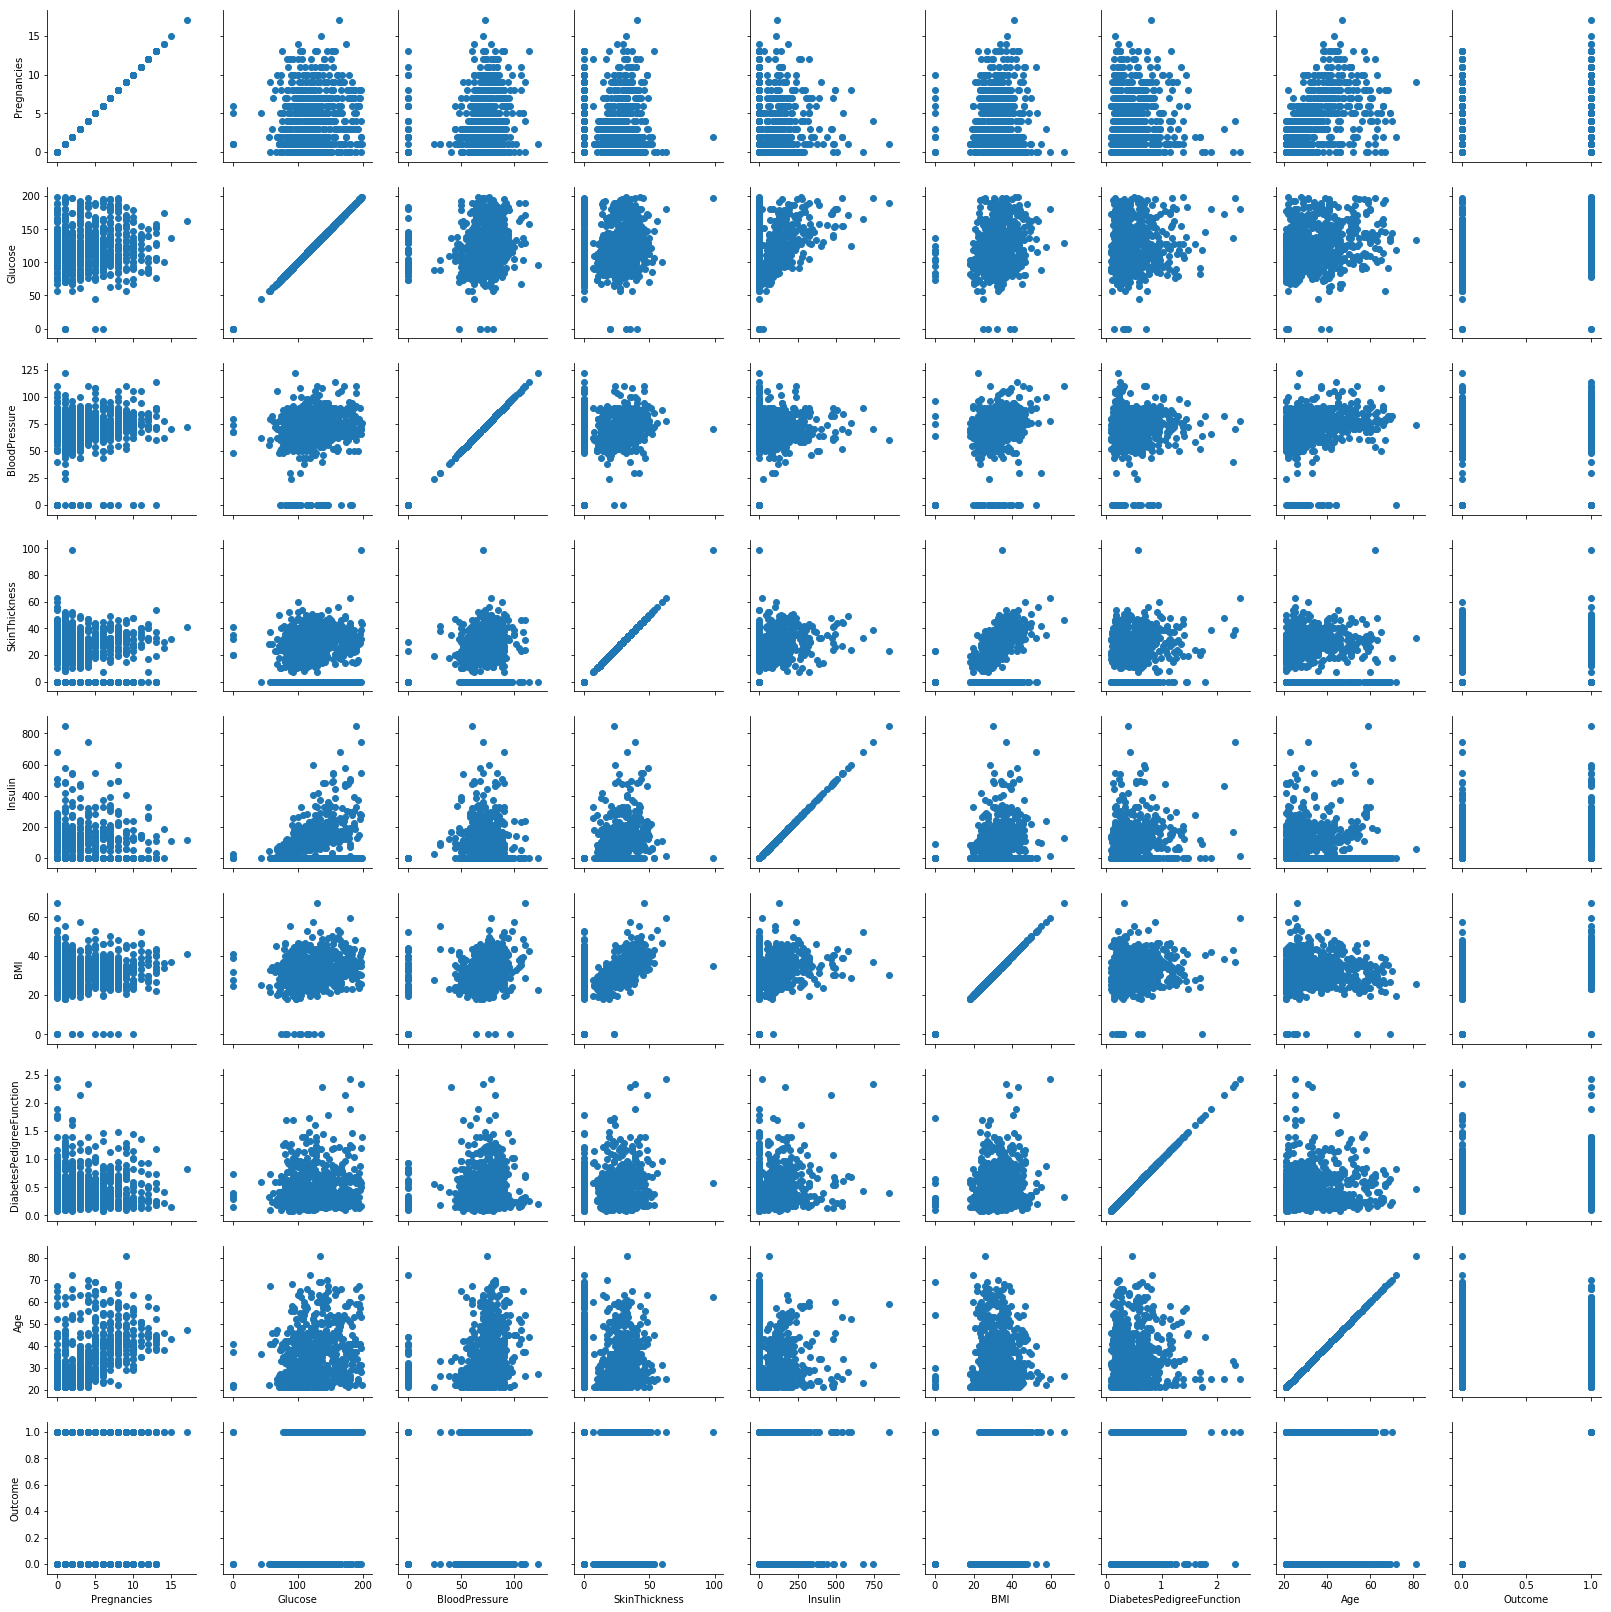

In [4]:
a= sns.PairGrid(df)
a.map(plt.scatter)

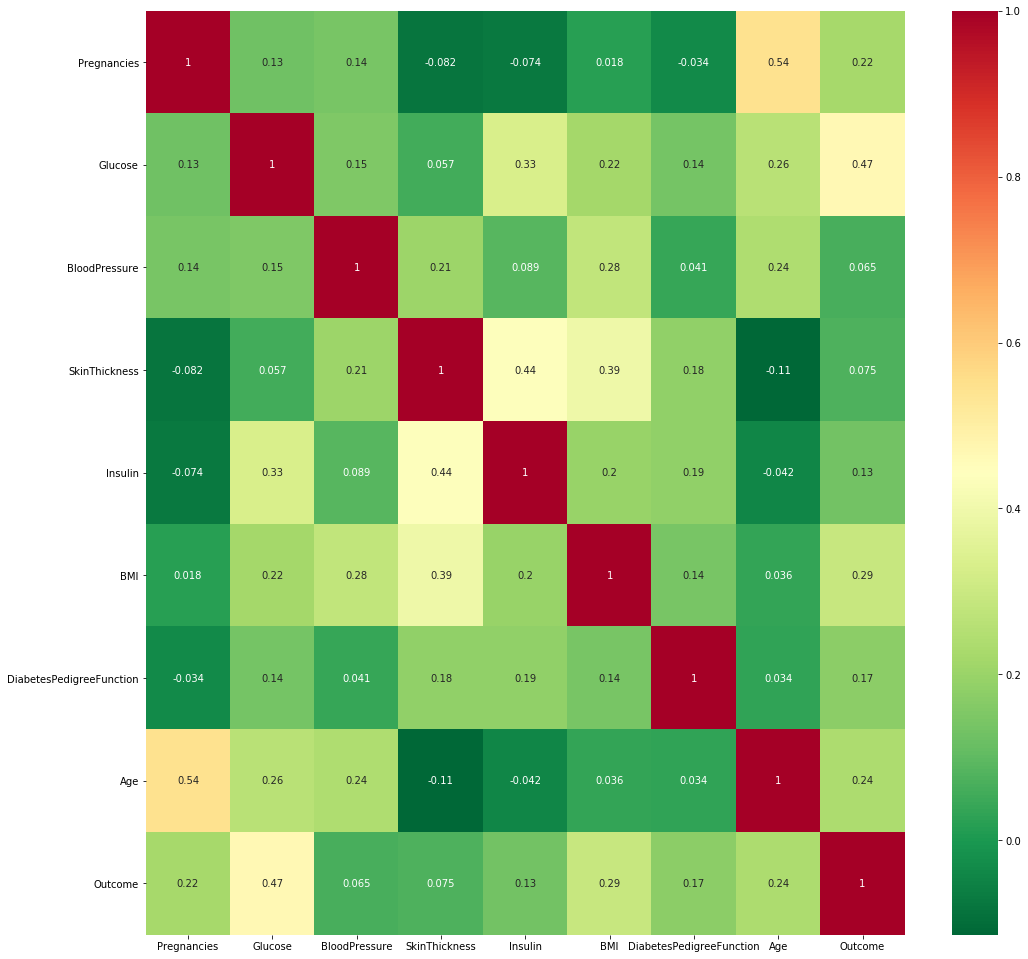

In [5]:
corrmat = df.corr()
top_cor_features=corrmat.index
plt.figure(figsize=(17,17))
g=sns.heatmap(df[top_cor_features].corr(),annot=True,cmap='RdYlGn_r')

In [6]:
X = df.iloc[:,:8].values
y = df.iloc[:,8].values

**Spltting the dataset**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
#df['Age'].hist() #Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age

***Imputation required as their are missing values that are zero***

In [9]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 0, strategy = 'mean', axis = 0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


* ***Using logistic regression***

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[116,  14],
       [ 30,  32]])

In [13]:
# Making the classification report
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.89      0.84       130\n           1       0.70      0.52      0.59        62\n\n    accuracy                           0.77       192\n   macro avg       0.75      0.70      0.72       192\nweighted avg       0.76      0.77      0.76       192\n'

In [14]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7708333333333334

* ***Using Decision Tree Classification***

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,  25],
       [ 20,  42]])

In [16]:
# Making the classification report
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.81      0.82       130\n           1       0.63      0.68      0.65        62\n\n    accuracy                           0.77       192\n   macro avg       0.73      0.74      0.74       192\nweighted avg       0.77      0.77      0.77       192\n'

In [17]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.765625

* ***Using Random Foprest Classification***

In [18]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  15],
       [ 28,  34]])

In [19]:
# Making the classification report
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.88      0.84       130\n           1       0.69      0.55      0.61        62\n\n    accuracy                           0.78       192\n   macro avg       0.75      0.72      0.73       192\nweighted avg       0.77      0.78      0.77       192\n'

In [20]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7760416666666666

* ***Using Kernel SVM Classification***

In [21]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier= SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[130,   0],
       [ 62,   0]])

In [22]:
# Making the classification report
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.68      1.00      0.81       130\n           1       0.00      0.00      0.00        62\n\n    accuracy                           0.68       192\n   macro avg       0.34      0.50      0.40       192\nweighted avg       0.46      0.68      0.55       192\n'

In [23]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6770833333333334

*> **We can clearly see that Accuracy Score of Random Forest is best among all four***